En el modelo que vamos a desarrollar se pretende un rango de precios que indique qué tan alto es el precio real de los telefonos de acuerdo a sus caracteristicas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

train_data = pd.read_csv("../data/processed/train/train.csv")
test_data = pd.read_csv("../data/processed/test/test.csv")

train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN


In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

In [4]:
total_data.drop(['id',
 'talk_time',
 'sc_w',
 'sc_h',
 'px_width',
 'px_height',
 'mobile_wt',
 'm_dep',
 'fc',
 'blue'],     axis = 1, inplace = True)

In [5]:
total_data.drop(['pc'],axis = 1, inplace = True)

In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   clock_speed    3000 non-null   float64
 2   dual_sim       3000 non-null   int64  
 3   four_g         3000 non-null   int64  
 4   int_memory     3000 non-null   int64  
 5   n_cores        3000 non-null   int64  
 6   ram            3000 non-null   int64  
 7   three_g        3000 non-null   int64  
 8   touch_screen   3000 non-null   int64  
 9   wifi           3000 non-null   int64  
 10  price_range    2000 non-null   float64
dtypes: float64(2), int64(9)
memory usage: 257.9 KB


In [7]:
##
total_data_fact = total_data.copy()

total_data_fact["battery_power"] = pd.factorize(total_data_fact["battery_power"])[0]
total_data_fact["clock_speed"] = pd.factorize(total_data_fact["clock_speed"])[0]
total_data_fact["dual_sim"] = pd.factorize(total_data_fact["dual_sim"])[0]
total_data_fact["four_g"] = pd.factorize(total_data_fact["four_g"])[0]
total_data_fact["int_memory"] = pd.factorize(total_data_fact["int_memory"])[0]
total_data_fact["n_cores"] = pd.factorize(total_data_fact["n_cores"])[0]
total_data_fact["ram"] = pd.factorize(total_data_fact["ram"])[0]
total_data_fact["three_g"] = pd.factorize(total_data_fact["three_g"])[0]
total_data_fact["touch_screen"] = pd.factorize(total_data_fact["touch_screen"])[0]
total_data_fact["wifi"] = pd.factorize(total_data_fact["wifi"])[0]
total_data_fact["price_range"] = pd.factorize(total_data_fact["price_range"])[0]

In [8]:
from sklearn.model_selection import train_test_split

num_variables = ['battery_power',
 'clock_speed',
 'dual_sim',
 'four_g',
 'int_memory',
 'n_cores',
 'ram',
 'three_g',
 'touch_screen',
 'wifi']

# Dividimos el conjunto de datos en muestras de train y test
X = total_data_fact.drop("price_range", axis = 1)[num_variables]
y = total_data_fact["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,battery_power,clock_speed,dual_sim,four_g,int_memory,n_cores,ram,three_g,touch_screen,wifi
642,58,2,0,1,52,3,600,1,1,1
700,495,8,1,1,56,1,534,1,1,1
226,212,23,1,1,14,4,220,1,1,0
1697,1011,8,1,1,58,0,1374,1,0,0
1010,747,25,0,0,15,6,895,0,0,0


In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred = model.predict(X_test)
y_pred

array([-1,  2,  0,  3, -1,  1,  3, -1,  0, -1, -1,  2,  2, -1, -1,  1,  2,
        1, -1,  2,  3,  0,  1, -1,  0, -1, -1,  1,  3,  2,  2,  0,  2, -1,
        2,  2, -1,  0,  0,  0,  0,  3,  2,  1, -1,  3, -1,  2, -1,  2,  3,
       -1,  2, -1,  1, -1, -1,  2, -1,  2,  2,  3,  0,  2,  2,  1,  0,  0,
        1,  2, -1, -1, -1,  1,  0,  2, -1, -1, -1, -1,  1,  1,  3, -1, -1,
        0, -1,  3, -1, -1,  2,  0, -1,  3,  0,  0, -1, -1,  1, -1, -1,  0,
        3, -1,  0,  0, -1,  0,  2,  3, -1,  2,  3, -1,  0, -1,  1,  1,  0,
        2, -1,  2,  2,  3,  3, -1,  1,  1,  3,  2,  0,  3,  3,  1,  2,  2,
        1, -1,  2, -1,  2,  0, -1, -1, -1,  0, -1, -1, -1,  1, -1, -1,  0,
       -1,  1, -1,  0,  0, -1,  1, -1, -1,  0,  2, -1,  3,  2,  2, -1,  2,
       -1, -1,  3,  1, -1,  1, -1, -1,  3,  3,  2, -1, -1, -1,  2,  2,  2,
       -1,  0,  3,  1,  1, -1,  3,  0,  2,  2, -1,  2,  0,  0, -1,  1, -1,
        3,  0,  1, -1,  2, -1,  3,  1,  2, -1,  0,  1,  1,  0,  2, -1,  0,
       -1,  2, -1,  1,  1

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.4066666666666667

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.75      0.77      0.76       186
           0       0.23      0.29      0.26        98
           1       0.24      0.22      0.23       101
           2       0.27      0.28      0.27       105
           3       0.25      0.20      0.22       110

    accuracy                           0.41       600
   macro avg       0.35      0.35      0.35       600
weighted avg       0.40      0.41      0.40       600



In [13]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#Espacio de búsqueda de cada hiperparámetro para random forest
rf_grid = {"n_estimators": np.arange(50,100),
           "max_depth": [None,10,15,20,30],
           "min_samples_leaf": np.arange(5, 30, 5),
           "max_features": [10,15,20,"sqrt", "auto"]}

# Búsqueda por validación cruzada para random forest
rs_model = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions =rf_grid,
                              scoring    = 'accuracy',
                              n_iter= 10,
                              cv=5,
                              n_jobs=None,
                              verbose=False)

rs_model.fit(X_train, y_train)

/workspaces/app_Flask/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/workspaces/app_Flask/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/workspaces/app_Flask/.venv/lib/python3.11/site-packages/sklearn/base.py", line 1356, in wrapper
    estimator._validate_params()
  File "/workspaces/app_Flask/.venv/lib/python3.11/site-packages/sklearn/base.py", line 469, in _validate_params
    validate_parameter_constraint

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': [10, 15, ...], 'min_samples_leaf': array([ 5, 10, 15, 20, 25]), 'n_estimators': array([50, 51..., 97, 98, 99])}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,False
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [14]:
rs_model.best_params_

{'n_estimators': np.int64(55),
 'min_samples_leaf': np.int64(10),
 'max_features': 15,
 'max_depth': None}

In [15]:
rs_model.best_score_

np.float64(0.40499999999999997)

In [16]:
rf_ideal_model = RandomForestClassifier(**rs_model.best_params_)

rf_ideal_model.fit(X_train, y_train)

,n_estimators,np.int64(55)
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,np.int64(10)
,min_weight_fraction_leaf,0.0
,max_features,15
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
y_preds = rf_ideal_model.predict(X_test)
y_preds_train = rf_ideal_model.predict(X_train)

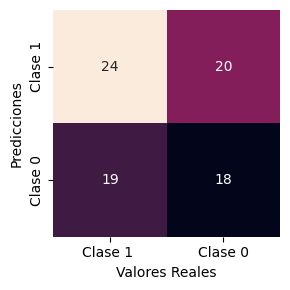

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_preds,labels=[1, 0])

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(cm, index=["Clase 1", "Clase 0"],
                     columns=["Clase 1 ", "Clase 0"])

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.tight_layout()

plt.show()

In [19]:
confusion_matrix(y_test, y_preds, labels=[1, 0])

array([[24, 20],
       [19, 18]])

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_preds_train)

0.7825

In [21]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          -1       0.76      0.77      0.77       186
           0       0.19      0.18      0.19        98
           1       0.25      0.24      0.24       101
           2       0.20      0.22      0.21       105
           3       0.25      0.25      0.25       110

    accuracy                           0.39       600
   macro avg       0.33      0.33      0.33       600
weighted avg       0.39      0.39      0.39       600



In [22]:
report = classification_report(y_test, y_preds,output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
-1,0.761905,0.774194,0.768000,186.000000
0,0.191489,0.183673,0.187500,98.000000
1,0.252632,0.237624,0.244898,101.000000
2,0.200000,0.219048,0.209091,105.000000
3,0.252336,0.245455,0.248848,110.000000
accuracy,0.393333,0.393333,0.393333,0.393333
macro avg,0.331672,0.331999,0.331667,600.000000
weighted avg,0.391255,0.393333,0.392143,600.000000


In [23]:
from pickle import dump

with open("../src/decision_tree_regressor_default_42.sav", "wb") as file:
    dump(model, file)